In [2]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler 

In [4]:
df=pd.read_csv("Social_Network_Ads.csv")

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
df=df[['Age','EstimatedSalary','Purchased']]

In [8]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [9]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [10]:

X=df.iloc[:,0:2] 
y=df.iloc[:,-1]  #Targed colum

In [13]:
scalar=StandardScaler()

In [16]:
X_scaled=scalar.fit_transform(X)  #Z score normalization

In [17]:
X_scaled.shape

(400, 2)

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [19]:
model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(2,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

Difference between batch gradient descent and stochiastic gradient descent
In batch gradient descent the entire batch of data that is all rows present are sent at once and if number of epochs are one the weights and biases are updated once only
But for stochastics the weights and biases are updated upto the number of rows present in the dataset .Here in the question below we considered batch size as 1 for stochastics gradient descent which means make 400 batches for 400rows

In [ ]:
# Defining the loss function and optimizer
# stochastics gradient descent
import time
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
start=time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)
print(time.time()-start)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9185 - loss: 0.2009 - val_accuracy: 0.8750 - val_loss: 0.2918
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9244 - loss: 0.1940 - val_accuracy: 0.8625 - val_loss: 0.3156
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.9049 - loss: 0.2234 - val_accuracy: 0.8750 - val_loss: 0.2948
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.9396 - loss: 0.1647 - val_accuracy: 0.9000 - val_loss: 0.2548
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.9251 - loss: 0.1810 - val_accuracy: 0.8750 - val_loss: 0.2748
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.9207 - loss: 0.1957 - val_accuracy: 0.8750 - val_loss: 0.2810
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.9131 - loss: 0.1962 - val_accuracy: 0.8625 - val_loss: 0.2991
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9028 - loss: 0.1

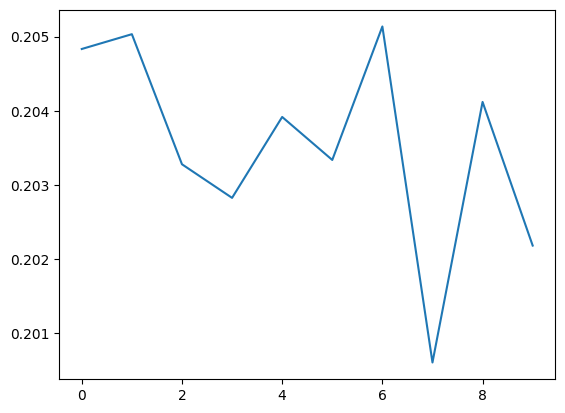

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [41]:
# Batch  gradient descent since the batch size is 400 

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
start=time.time()
history = model.fit(X_scaled,y,epochs=100,batch_size=400,validation_split=0.2)
print(time.time()-start)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step - accuracy: 0.9156 - loss: 0.1946 - val_accuracy: 0.8750 - val_loss: 0.2849
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9187 - loss: 0.1946 - val_accuracy: 0.8750 - val_loss: 0.2830
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9219 - loss: 0.1947 - val_accuracy: 0.8750 - val_loss: 0.2823
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9187 - loss: 0.1946 - val_accuracy: 0.8750 - val_loss: 0.2823
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9187 - loss: 0.1945 - val_accuracy: 0.8750 - val_loss: 0.2819
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9156 - loss: 0.1945 - val_accuracy: 0.8750 - val_loss: 0.2815
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9156 - loss: 0.1945 - val_accuracy: 0.8750 - val_loss: 0.2821
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9187 - loss: 0.1945 - val_accuracy: 0.8750 - val_loss

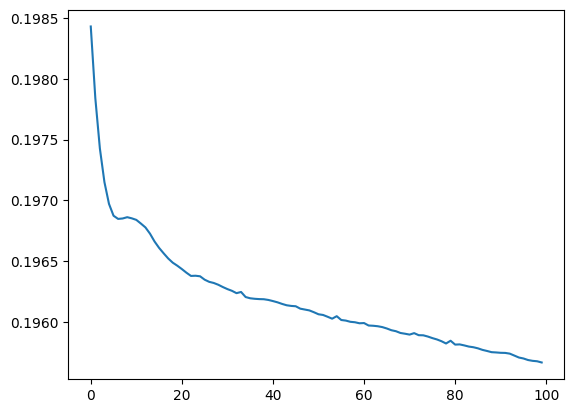

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64